<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 11
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion de los $ejercicios$ $1$ y $2$ de la $TS11$. En este caso nos encontramos con la $sintesis$ de $circuitos$ a partir de dos $funciones$ $inmitancia$ dadas y la sintesis de una $trasnferencia$. Las dos se realizaran mediante sistesis $grafica$ y $analitica$.

<img src="./Enunciado.PNG" align="middle" width="1000" /> 

## Resolucion

### Resolucion ejercicio 1

In [105]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ1_.pdf", width=900, height=1000)

### Resolucion ejercicio 2

In [106]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ2.pdf", width=900, height=900)

## Ejercicio 1)

In [107]:
import sympy as sp
from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie,  dibujar_tanque_derivacion,  dibujar_espacio_derivacion, Capacitor, Inductor, Drawing

# Resolución simbólica

s = sp.symbols('s ', complex=True)

Y11 = 3*s*(s**2+sp.Rational(7,3))/((s**2+2)*(s**2+5))

In [108]:
omega_cero = 1   # Omega de resonancia

Z2, Zc1 = remover_polo_dc(1/Y11, omega_zero = omega_cero)

C1 = 1/(s*Zc1)

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_cero)

# quedaría solo un tanque en Y4, no especifico omega.
Y6, Zt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

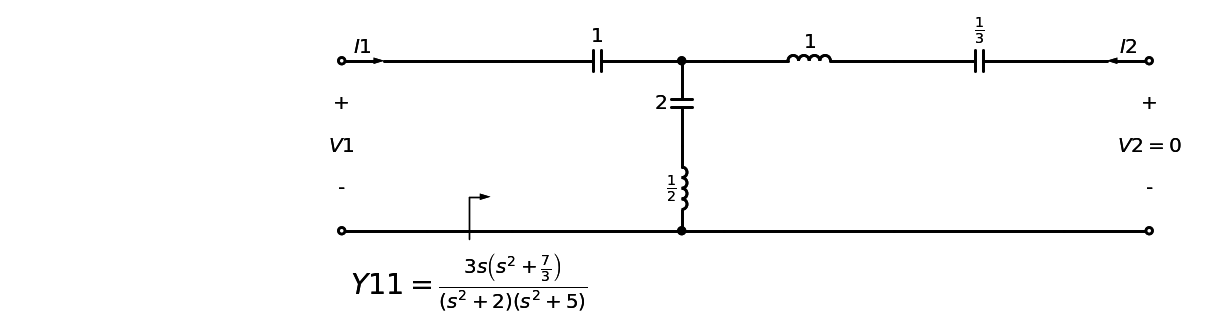

In [109]:
# Dibujamos la red resultante:

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d, voltage_lbl = ('+', '$V1$', '-'), current_lbl = '$I1$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Y11', Y11, hacia_salida = True, k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_serie(d, Inductor, L3)

d = dibujar_elemento_serie(d, Capacitor, C3)

d = dibujar_puerto_salida(d, voltage_lbl = ('+', '$V2 = 0$', '-'), current_lbl = '$I2$')

display(d)

$Y11$ tiene como definicion:

$$Y11 = \left[\frac{I1}{V1}\right]_{V2\space=\space0}$$

Por lo tanto, para poder decir que la $entrada$ es $Y11$, ya que poner en corto la $salida$, es decir, $V2$ $=$ $0$.

## Ejercicio 2)

In [110]:
import sympy as sp
import numpy as np

from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion, Drawing
from pytc2.remociones import remover_valor_en_infinito, remover_valor, remover_polo_dc,remover_polo_sigma
from pytc2.sistemas_lineales import analyze_sys

# Resolución simbólica

s = sp.symbols('s ', complex=True)

Z11 = ((s + 2)*(s + 4))/(s + 3)/s

omega_cero_Y21 = 1   # Omega de resonancia

In [111]:
Z2, R1 = remover_valor_en_infinito(Z11)

k_cero = sp.simplify(sp.expand(Z2*s)).subs(s, -(omega_cero_Y21**2))

Zc1 = k_cero/s

Z4 = Z2 - Zc1

C1 = 1/(s*Zc1)

Y6, Y3, R2, C2 = remover_polo_sigma(1/Z4, 1, isImpedance = False)

C3 = Y6/s

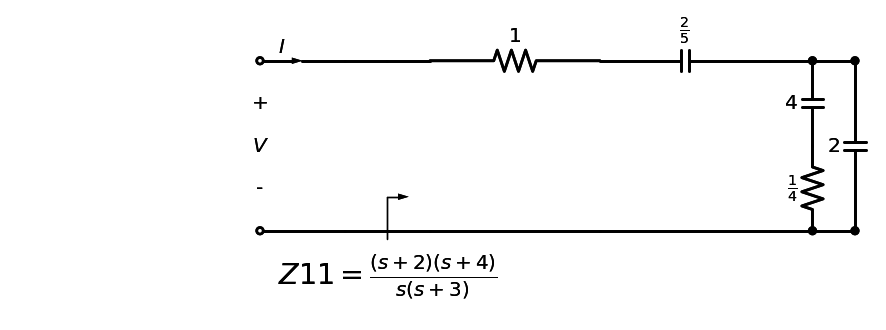

In [112]:
# Dibujamos la red resultante:

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z11',  
                                          Z11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, R1)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_derivacion(d, sym_R_label = R2, capacitor_lbl = C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Capacitor, C3)
    
display(d)

Los valores de las $resoluciones$ verifican con lo hayado en los $codigos$.

## Circuito LTSpice EJ1

<img src="./Circuito_1.PNG" align="middle" width="1000" /> 

## Impedancia Y11

<img src="./Circuito_1_Y11.PNG" align="middle" width="1000" /> 

## Impedancia Y21

<img src="./Circuito_1_Y21.PNG" align="middle" width="1000" /> 

Para entender bien estos $graficos$, lo ideal seria pasar las $admitancias$ del enunciado a frecuencia, en donde podamos hacer un analisis mas riguroso de estos $parametros$. Partimos primero de $Y11$. En este caso tenemos esta admitancia:

$$Y(S) = \frac{3S(S^2 + \frac{7}{3})}{(S^2 + 2)(S^2 + 5)}$$

Para poder pasar a $frecuencia$, nos trasladamos al $dominio$ de la frecuencia, es decir:

$$Y(J\omega) = Y(S)|_{S = J\omega}$$

Finalmente nos queda:

$$Y(J\omega) = \frac{3J\omega((J\omega)^2 + \frac{7}{3})}{((J\omega)^2 + 2)((J\omega)^2 + 5)}$$

$$Y(J\omega) = \frac{3J\omega(-\omega^2 + \frac{7}{3})}{(-\omega^2 + 2)(-\omega^2 + 5)}$$

Sin calcular el $modulo$, se observan distintas cosas. Si tendemos $\omega$ a $0$ o a $\infty$, obtendremos $0$ $\Omega$. Ahora, si observamos bien, tenemos dos $polos$ en $\sqrt{2}$ y $\sqrt{5}$. A partir de estos, podemos obtener las frecuencias las cuales, van a verificar los graficos de arriba. Esto ultimo es muy importante ya que, estos $polos$ corresponden para las dos admitancias $(Parametros Y del cuadripolo a analizar)$. Estas dos tienen el mismo denominador por lo tanto los mismos $polos$. 

Procedemos a calcular las $frecuencias$ partiendo de:

$$\omega = 2\pi f$$

$$f1 = \frac{\sqrt{2}}{2\pi} \quad ∧ \quad f2 = \frac{\sqrt{5}}{2\pi}$$

$$f1 \approx 0.225 Hz \quad ∧ \quad f2 \approx 0.355 Hz$$

Estas $frecuencias$ se ven en los graficos. Se puede observar como el $modulo$ no es 0 en ninguno de las dos. Esto verifica el $circuito$ diseñado.

## Circuito LTSpice EJ2

<img src="./Circuito_2.PNG" align="middle" width="1000" /> 

## Respuesta en frecuencia

<img src="./Circuito_2_T_.PNG" align="middle" width="1000" /> 

Para verificar si el grafico es acorde a lo pedido, se verifica cuanto es la atenuacion en 0, ademas de otro valores importantes com $\omega_0$ e $\infty$. Para lograr esto, se parte de la transferencia en el dominio de S y se transporta es domino al de frecuencia la frecuencia. Esto se hace de la siguiente manera.

Partimos de T(s):

$$T(S) = \frac{K(S + 1)}{(S + 2)(S + 4)}$$

Siendo: $K = \frac{1}{2}$

Hacemos la $sustitucion$ de S por $J\omega$:

$$Y(J\omega) = Y(S)|_{S = J\omega}$$

Esto nos queda:

$$T(J\omega) = \frac{K(J\omega + 1)}{(J\omega + 2)(J\omega + 4)}$$

$$T(J\omega) = \frac{K(1 + J\omega)}{(8 - \omega^2) + (6J\omega)}$$

Calculamos el $modulo$:

$$|T(J\omega)| = K\sqrt{\frac{(1 + \omega^2)}{(8 - \omega^2)^2 + 36\omega^2}}$$

Verificamos que pasa en los $puntos$ especificados anteriormente:

$$|T(J0)| = \frac{K}{8} \Rightarrow |T(J0)| = \frac{1}{16} \Rightarrow |T(J0)| = 62.5.10^{-3}$$

$$|T(J\omega_0)| = \frac{\sqrt{2}}{16} \Rightarrow |T(J\omega_0)| = 88.38.10^{-3}$$

Siendo: $\omega_0 = \sqrt{8}$

$$|T(J\infty)| = K\lim_{x\rightarrow\infty}\sqrt{\frac{(1 + \omega^2)}{(8 - \omega^2)^2 + 36\omega^2}} \Rightarrow |T(J\infty)| = 0$$

Estos $tres$ valores del $modulo$ verifican con el $grafico$ del $circuito$.